In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import glob

# Specify the directory or pattern to match data files
data_directory_path = '/content/drive/MyDrive/Data-EEG-25-users-Neuromarketing/25-users/*.txt'

# Specify the directory or pattern to match label files
label_directory_path = '/content/drive/MyDrive/Data-EEG-25-users-Neuromarketing/labels/*.lab'


# Get a list of file paths that match the specified pattern for data files
data_file_paths = glob.glob(data_directory_path)

# Initialize an empty array to store the flattened data
flattened_data = np.empty((0, 7168), dtype=float)

# Iterate over the list of data file paths and flatten each file
for data_file_path in data_file_paths:
    # Read the content of the data file into a numpy array
    data = np.loadtxt(data_file_path)

    # Flatten the array and reshape it into a single row
    flattened_row = data.flatten().reshape(1, -1)

    # Concatenate the flattened row to the result array
    flattened_data = np.concatenate((flattened_data, flattened_row), axis=0)

# Display the shape of the final flattened data
flattened_data = flattened_data[:, :512]
print("Shape of flattened data:", flattened_data.shape)
flattened_data = flattened_data[:, :512]

# Get a list of file paths that match the specified pattern for label files
label_file_paths = glob.glob(label_directory_path)

# Initialize an empty list to store the labels
labels = []

# Define a mapping from words to numerical values
label_mapping = {"disike": 0, "like": 1}

# Iterate over the list of label file paths and convert each label to a numerical value
for label_file_path in label_file_paths:
    # Read the content of the label file
    with open(label_file_path, 'r') as label_file:
        label_word = label_file.read().strip().lower()

        # Convert the label word to a numerical value using the mapping
        label_value = label_mapping.get(label_word, None)

        if label_value is not None:
            labels.append(label_value)

# Convert the list of labels to a numpy array
labels = np.array(labels).reshape(-1, 1)

# Display the shape of the final labels
print("Shape of labels:", labels.shape)
# Concatenate flattened_data and labels horizontally
combined_data = np.hstack((flattened_data, labels))

# Display the shape of the combined data
print("Shape of combined data:", combined_data.shape)


Shape of flattened data: (1045, 512)
Shape of labels: (1045, 1)
Shape of combined data: (1045, 513)


In [26]:
import pandas as pd
import numpy as np
import glob

# Assuming your Excel file is named 'your_excel_file.xlsx' and is in the current working directory
# Update the file path accordingly
excel_file_path      = '/content/drive/MyDrive/SINES_DATA/Data.xlsx'
X_labels_path        = '/content/drive/MyDrive/SINES_DATA/X_labels/*.lab'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path, header=None)

# Get the values from the DataFrame
data = df.values

# Reshape the data to the desired shape (15 x 512)
desired_shape = (15, 512)

# Ensure that the number of columns is divisible by 512
if data.shape[1] % desired_shape[1] == 0:
    # Reshape the data to the desired shape
    X_reshaped_data = np.reshape(data, desired_shape, order='F')  # Use order='F' to fill the reshaped array column-wise
    print("Shape of reshaped data:", X_reshaped_data.shape)
else:
    print("Number of columns in the Excel data is not divisible by 512. Adjust the data or desired shape.")

# Get a list of file paths that match the specified pattern for label files
X_labels_file_paths = glob.glob(X_labels_path)

# Initialize an empty list to store the labels
X_labels = []

# Define a mapping from words to numerical values
label_mapping = {"disike": 0, "like": 1}

# Iterate over the list of label file paths and convert each label to a numerical value
for X_labels_file_path in X_labels_file_paths:
    # Read the content of the label file
    with open(X_labels_file_path, 'r') as X_label_file:
        X_label_word = X_label_file.read().strip().lower()
        # print(X_label_word)
        # Convert the label word to a numerical value using the mapping
        label_value = label_mapping.get(X_label_word, None)
        # print(label_value)
        # print(X_label_file)
        if label_value is not None:
            X_labels.append(label_value)

# Convert the list of labels to a numpy array
X_labels = np.array(X_labels).reshape(-1, 1)

# Display the shape of the final labels
print("Shape of X_labels:", X_labels.shape)
# Concatenate flattened_data and labels horizontally
X_combined_data = np.hstack((X_reshaped_data, X_labels))

# Display the shape of the combined data
print("Shape of X_combined data:", X_combined_data.shape)


Shape of reshaped data: (15, 512)
Shape of X_labels: (15, 1)
Shape of X_combined data: (15, 513)


Accuracy (KNN): 0.784688995215311

Confusion Matrix (KNN Test Data):
[[97 17]
 [28 67]]

Classification Report (KNN Test Data):
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       114
         1.0       0.80      0.71      0.75        95

    accuracy                           0.78       209
   macro avg       0.79      0.78      0.78       209
weighted avg       0.79      0.78      0.78       209



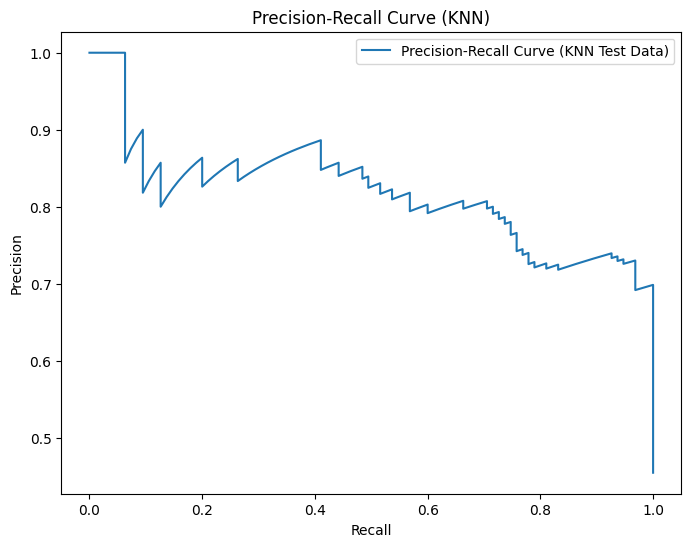


Accuracy on new data (KNN): 0.4666666666666667

Confusion Matrix (KNN New Data):
[[0 8]
 [0 7]]

Classification Report (KNN New Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.47      1.00      0.64         7

    accuracy                           0.47        15
   macro avg       0.23      0.50      0.32        15
weighted avg       0.22      0.47      0.30        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


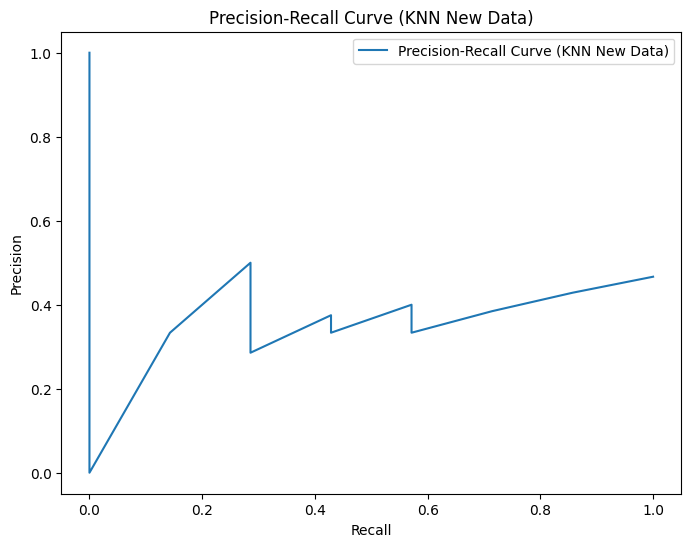

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X_knn = combined_data[:, :-1]  # Features (flattened data)
y_knn = combined_data[:, -1]   # Labels

# Apply Min-Max normalization
scaler = MinMaxScaler()
X_knn_normalized = scaler.fit_transform(X_knn)

# Split the normalized data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_normalized, y_knn, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
knn_classifier.fit(X_train_knn, y_train_knn)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test_knn)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)

# Confusion matrix and classification report for the KNN test data
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)
classification_report_knn = classification_report(y_test_knn, y_pred_knn)

print("\nConfusion Matrix (KNN Test Data):")
print(conf_matrix_knn)

print("\nClassification Report (KNN Test Data):")
print(classification_report_knn)

# Precision-Recall Curve for the KNN test data
precision_knn, recall_knn, _ = precision_recall_curve(y_test_knn, knn_classifier.decision_function(X_test_knn))

plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, label='Precision-Recall Curve (KNN Test Data)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend()
plt.show()

# Assuming X_combined_data is your new feature matrix (X_new)
X_new_knn = X_combined_data[:, :-1]  # Features (flattened data)
y_new_knn = X_combined_data[:, -1]   # Labels

# Apply Min-Max normalization to the new data
X_new_knn_normalized = scaler.transform(X_new_knn)

# Make predictions on the new data
y_new_pred_knn = knn_classifier.predict(X_new_knn_normalized)

# Calculate accuracy on the new data
accuracy_new_knn = accuracy_score(y_new_knn, y_new_pred_knn)
print("\nAccuracy on new data (KNN):", accuracy_new_knn)

# Confusion matrix and classification report for the KNN new data
conf_matrix_new_knn = confusion_matrix(y_new_knn, y_new_pred_knn)
classification_report_new_knn = classification_report(y_new_knn, y_new_pred_knn)

print("\nConfusion Matrix (KNN New Data):")
print(conf_matrix_new_knn)

print("\nClassification Report (KNN New Data):")
print(classification_report_new_knn)

# Precision-Recall Curve for the KNN new data
precision_new_knn, recall_new_knn, _ = precision_recall_curve(y_new_knn, knn_classifier.decision_function(X_new_knn_normalized))

plt.figure(figsize=(8, 6))
plt.plot(recall_new_knn, precision_new_knn, label='Precision-Recall Curve (KNN New Data)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN New Data)')
plt.legend()
plt.show()


Accuracy (Test Data): 0.8708133971291866

Confusion Matrix (Test Data):
[[99 15]
 [12 83]]

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       114
         1.0       0.85      0.87      0.86        95

    accuracy                           0.87       209
   macro avg       0.87      0.87      0.87       209
weighted avg       0.87      0.87      0.87       209



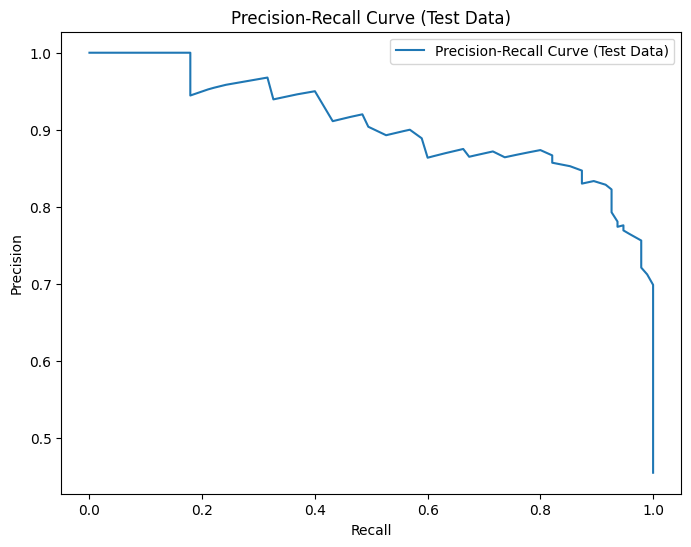


Accuracy on new data: 0.3333333333333333


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Test Data):", accuracy_rf)

# Confusion matrix and classification report for the test data
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("\nConfusion Matrix (Test Data):")
print(conf_matrix_rf)

print("\nClassification Report (Test Data):")
print(classification_report_rf)

# Precision-Recall Curve for the test data
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Precision-Recall Curve (Test Data)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Data)')
plt.legend()
plt.show()

# Assuming X_combined_data is your new feature matrix (X_new)
X_new = X_combined_data[3:, :-1]  # Features (flattened data)
y_new = X_combined_data[3:, -1]   # Labels

# Make predictions on the new data
y_new_pred_rf = rf_classifier.predict(X_new)

# Calculate accuracy on the new data
accuracy_new_rf = accuracy_score(y_new, y_new_pred_rf)
print("\nAccuracy on new data:", accuracy_new_rf)





Accuracy (Test Data): 0.8325358851674641

Confusion Matrix (Test Data):
[[100  14]
 [ 21  74]]

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       114
         1.0       0.84      0.78      0.81        95

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.83      0.83      0.83       209



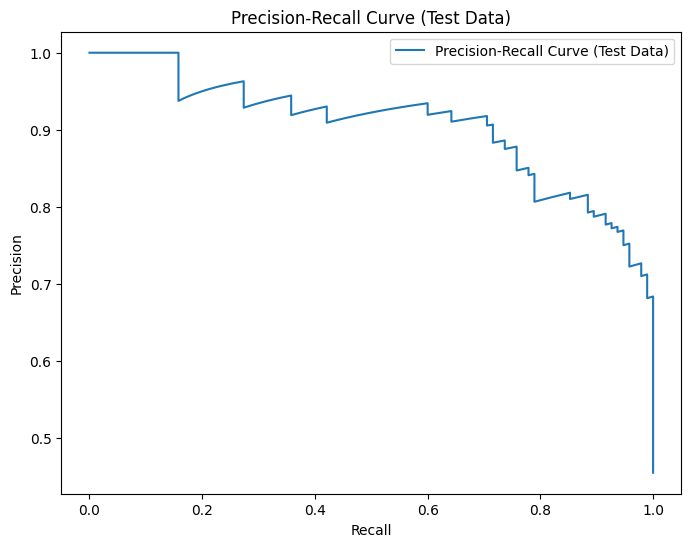


Accuracy on new data: 0.4666666666666667


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data):", accuracy)

# Confusion matrix and classification report for the test data
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
classification_report_xgb = classification_report(y_test, y_pred)

print("\nConfusion Matrix (Test Data):")
print(conf_matrix_xgb)

print("\nClassification Report (Test Data):")
print(classification_report_xgb)

# Precision-Recall Curve for the test data
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label='Precision-Recall Curve (Test Data)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Data)')
plt.legend()
plt.show()

# Assuming X_combined_data is your new feature matrix (X_new)
X_new = X_combined_data[:, :-1]  # Features (flattened data)
y_new = X_combined_data[:, -1]   # Labels

# Make predictions on the new data
y_new_pred_xgb = xgb_classifier.predict(X_new)

# Calculate accuracy on the new data
accuracy_new_xgb = accuracy_score(y_new, y_new_pred_xgb)
print("\nAccuracy on new data:", accuracy_new_xgb)


